mnistのデータを読み込みます。

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

数値を [0, 1] に正規化します。

In [2]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

CNNのモデルを作成します。

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(tf.keras.layers.Dropout(rate=0.25))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(tf.keras.layers.Dropout(rate=0.25))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.Dense(units=1024, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(rate=0.5))

model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

compile()によって訓練方法を設定します。

In [8]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

訓練します。CNNは畳み込み演算を含むため、計算量が多く、時間がかかります。verbose=1として途中経過を少し表示し、終了時刻を見積もれるようにしています。

In [9]:
train_hist=model.fit(training_images, training_labels, epochs=50, verbose=1,
                     validation_data=(test_images, test_labels), batch_size=128)

Epoch 1/50


2023-06-29 05:34:28.822713: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


469/469 [==============================] - 34s 71ms/step - loss: 0.5180 - accuracy: 0.8264 - val_loss: 0.9471 - val_accuracy: 0.6986
Epoch 2/50
 20/469 [>.............................] - ETA: 31s - loss: 0.3495 - accuracy: 0.8789

学習曲線をプロットします。

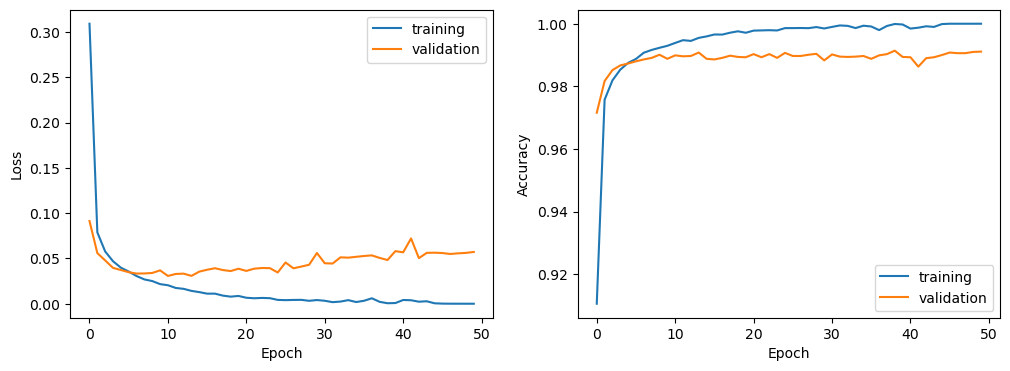

In [6]:
import matplotlib.pyplot as plt
import numpy as np
figs, axs=plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(train_hist.history['loss'], label='training')
axs[0].plot(train_hist.history['val_loss'], label='validation')
axs[0].legend()
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[1].plot(train_hist.history['accuracy'], label='training')
axs[1].plot(train_hist.history['val_accuracy'], label='validation')
axs[1].legend()
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
plt.show()

最終的な検証用の損失と精度を数値で確認しておきます。

In [7]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0572 - accuracy: 0.9911


[0.05717386305332184, 0.991100013256073]

学習済みモデルをファイルに保存します。

In [8]:
model.save('my_mnist_model')

INFO:tensorflow:Assets written to: my_mnist_model/assets


INFO:tensorflow:Assets written to: my_mnist_model/assets


H5形式でも保存してみる。

In [9]:
model.save('my_mnist_model.h5')